In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
from PIL import Image
from tensorflow.keras.preprocessing import image

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harshjadhav6301","key":"f9eb106ef864c05a5d5a7a14e14d9034"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d gti-upm/leapgestrecog

100% 2.13G/2.13G [00:24<00:00, 87.7MB/s]
100% 2.13G/2.13G [00:24<00:00, 92.7MB/s]


In [8]:
!unzip Valid_data.zip

Archive:  Valid_data.zip
   creating: Valid_data/
   creating: Valid_data/0/
   creating: Valid_data/0/01_palm/
  inflating: Valid_data/0/01_palm/123390997-a-hand-signs-raise-arm-and-showing-a-palm-with-five-fingers-meaning-dont-or-stop-on-white-background.png  
  inflating: Valid_data/0/01_palm/800px_COLOURBOX10071907.png  
  inflating: Valid_data/0/01_palm/pal.png  
  inflating: Valid_data/0/01_palm/palm.png  
  inflating: Valid_data/0/01_palm/palm1.png  
  inflating: Valid_data/0/01_palm/palm3.png  
   creating: Valid_data/0/02_l/
  inflating: Valid_data/0/02_l/l.png  
  inflating: Valid_data/0/02_l/l1.png  
  inflating: Valid_data/0/02_l/l3.png  
  inflating: Valid_data/0/02_l/l4.png  
  inflating: Valid_data/0/02_l/l5.png  
  inflating: Valid_data/0/02_l/l6.png  
   creating: Valid_data/0/03_fist/
  inflating: Valid_data/0/03_fist/f.png  
  inflating: Valid_data/0/03_fist/f2.png  
  inflating: Valid_data/0/03_fist/f3.png  
  inflating: Valid_data/0/03_fist/f4.png  
  inflating: Va

In [9]:
!unzip leapgestrecog.zip

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

In [10]:
PATH = "/content/leapgestrecog/leapGestRecog"
VALIDATION_PATH = "/content/Valid_data"
RANDOM_STATE = 42
TEST_SIZE = 0.3
IMG_SIZE = 128

In [29]:
def load_image(img_path, resize=None):
  img = Image.open(img_path)
  if resize is not None:
    img = img.resize((resize, resize))
  img_array = np.array(img)
  plt.imshow(img_array)
  return img_array

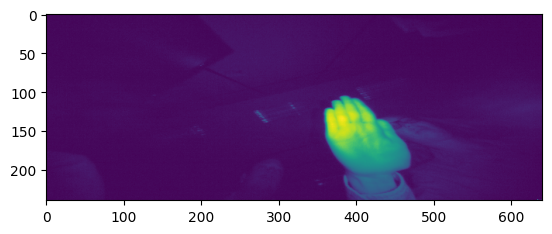

In [31]:
img = load_image("/content/leapgestrecog/leapGestRecog/00/01_palm/frame_00_01_0001.png")

In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your training and validation data
TRAIN_PATH = PATH
VALID_PATH = VALIDATION_PATH

# Define image size and batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 64

# Create an ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values
    rotation_range=20,         # Randomly rotate images
    width_shift_range=0.2,     # Randomly shift images horizontally
    height_shift_range=0.2,    # Randomly shift images vertically
    horizontal_flip=True,      # Randomly flip images horizontally
    validation_split=0.2       # Split data into training and validation
)

# Create an ImageDataGenerator for validation data (no data augmentation)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Create training and validation data generators
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training'          # Specify that this is the training data
)

valid_generator = valid_datagen.flow_from_directory(
    VALID_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='validation'        # Specify that this is the validation data
)

Found 16000 images belonging to 10 classes.
Found 0 images belonging to 1 classes.


In [33]:
# Define your model using TensorFlow/Keras
model = tf.keras.Sequential([
    # Add your layers here
    # Example:
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64,(2,2), activation='relu'),
    tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(512, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Conv2D(128,(2,2), activation='relu'),
    tf.keras.layers.Conv2D(64,(2,2),  activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Adjust num_classes as needed
])

In [34]:
EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights=True, min_delta=0.001, patience=10)
ReduceLr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', min_delta=0.001, patience=10, min_lr=0.001)

CALLBACKS = [EarlyStopping, ReduceLr]

In [35]:
# Compile your model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])

# Train your model
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    callbacks=CALLBACKS,
                    epochs=50)  # Adjust the number of epochs as needed

Epoch 1/50
250/250 [==============================] - ETA: 0s - loss: 2.0822 - accuracy: 0.2222

250/250 [==============================] - 118s 411ms/step - loss: 2.0822 - accuracy: 0.2222 - lr: 0.0010
Epoch 2/50
250/250 [==============================] - ETA: 0s - loss: 1.5761 - accuracy: 0.4308

250/250 [==============================] - 103s 413ms/step - loss: 1.5761 - accuracy: 0.4308 - lr: 0.0010
Epoch 3/50
250/250 [==============================] - ETA: 0s - loss: 0.9421 - accuracy: 0.6553

250/250 [==============================] - 102s 409ms/step - loss: 0.9421 - accuracy: 0.6553 - lr: 0.0010
Epoch 4/50
250/250 [==============================] - ETA: 0s - loss: 0.4383 - accuracy: 0.8419

250/250 [==============================] - 100s 401ms/step - loss: 0.4383 - accuracy: 0.8419 - lr: 0.0010
Epoch 5/50
250/250 [==============================] - ETA: 0s - loss: 0.2471 - accuracy: 0.9114

250/250 [==============================] - 101s 404ms/step - loss: 0.2471 - accuracy: 0.9114 - lr: 0.0010
Epoch 6/50
250/250 [==============================] - ETA: 0s - loss: 0.1955 - accuracy: 0.9287

250/250 [==============================] - 123s 491ms/step - loss: 0.1955 - accuracy: 0.9287 - lr: 0.0010
Epoch 7/50
250/250 [==============================] - ETA: 0s - loss: 0.1388 - accuracy: 0.9476

250/250 [==============================] - 106s 425ms/step - loss: 0.1388 - accuracy: 0.9476 - lr: 0.0010
Epoch 8/50
250/250 [==============================] - ETA: 0s - loss: 0.1233 - accuracy: 0.9535

250/250 [==============================] - 103s 412ms/step - loss: 0.1233 - accuracy: 0.9535 - lr: 0.0010
Epoch 9/50
250/250 [==============================] - ETA: 0s - loss: 0.1007 - accuracy: 0.9617

250/250 [==============================] - 101s 405ms/step - loss: 0.1007 - accuracy: 0.9617 - lr: 0.0010
Epoch 10/50
250/250 [==============================] - ETA: 0s - loss: 0.0849 - accuracy: 0.9656

250/250 [==============================] - 101s 402ms/step - loss: 0.0849 - accuracy: 0.9656 - lr: 0.0010
Epoch 11/50
250/250 [==============================] - ETA: 0s - loss: 0.0743 - accuracy: 0.9694

250/250 [==============================] - 111s 442ms/step - loss: 0.0743 - accuracy: 0.9694 - lr: 0.0010
Epoch 12/50
250/250 [==============================] - ETA: 0s - loss: 0.0781 - accuracy: 0.9692

250/250 [==============================] - 100s 400ms/step - loss: 0.0781 - accuracy: 0.9692 - lr: 0.0010
Epoch 13/50
250/250 [==============================] - ETA: 0s - loss: 0.0709 - accuracy: 0.9719

250/250 [==============================] - 102s 406ms/step - loss: 0.0709 - accuracy: 0.9719 - lr: 0.0010
Epoch 14/50
250/250 [==============================] - ETA: 0s - loss: 0.0522 - accuracy: 0.9783

250/250 [==============================] - 100s 400ms/step - loss: 0.0522 - accuracy: 0.9783 - lr: 0.0010
Epoch 15/50
250/250 [==============================] - ETA: 0s - loss: 0.0537 - accuracy: 0.9769

250/250 [==============================] - 101s 404ms/step - loss: 0.0537 - accuracy: 0.9769 - lr: 0.0010
Epoch 16/50
250/250 [==============================] - ETA: 0s - loss: 0.0766 - accuracy: 0.9704

250/250 [==============================] - 100s 401ms/step - loss: 0.0766 - accuracy: 0.9704 - lr: 0.0010
Epoch 17/50
250/250 [==============================] - ETA: 0s - loss: 0.0524 - accuracy: 0.9773

250/250 [==============================] - 100s 401ms/step - loss: 0.0524 - accuracy: 0.9773 - lr: 0.0010
Epoch 18/50
250/250 [==============================] - ETA: 0s - loss: 0.0454 - accuracy: 0.9796

250/250 [==============================] - 102s 409ms/step - loss: 0.0454 - accuracy: 0.9796 - lr: 0.0010
Epoch 19/50
250/250 [==============================] - ETA: 0s - loss: 0.0552 - accuracy: 0.9756

250/250 [==============================] - 100s 400ms/step - loss: 0.0552 - accuracy: 0.9756 - lr: 0.0010
Epoch 20/50
250/250 [==============================] - ETA: 0s - loss: 0.0546 - accuracy: 0.9764

250/250 [==============================] - 100s 399ms/step - loss: 0.0546 - accuracy: 0.9764 - lr: 0.0010
Epoch 21/50
250/250 [==============================] - ETA: 0s - loss: 0.0492 - accuracy: 0.9781

250/250 [==============================] - 101s 405ms/step - loss: 0.0492 - accuracy: 0.9781 - lr: 0.0010
Epoch 22/50
250/250 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9795

250/250 [==============================] - 101s 405ms/step - loss: 0.0436 - accuracy: 0.9795 - lr: 0.0010
Epoch 23/50
250/250 [==============================] - ETA: 0s - loss: 0.0505 - accuracy: 0.9779

250/250 [==============================] - 100s 400ms/step - loss: 0.0505 - accuracy: 0.9779 - lr: 0.0010
Epoch 24/50
250/250 [==============================] - ETA: 0s - loss: 0.0467 - accuracy: 0.9797

250/250 [==============================] - 101s 404ms/step - loss: 0.0467 - accuracy: 0.9797 - lr: 0.0010
Epoch 25/50
250/250 [==============================] - ETA: 0s - loss: 0.0544 - accuracy: 0.9772

250/250 [==============================] - 99s 397ms/step - loss: 0.0544 - accuracy: 0.9772 - lr: 0.0010
Epoch 26/50
250/250 [==============================] - ETA: 0s - loss: 0.0494 - accuracy: 0.9784

250/250 [==============================] - 100s 402ms/step - loss: 0.0494 - accuracy: 0.9784 - lr: 0.0010
Epoch 27/50
250/250 [==============================] - ETA: 0s - loss: 0.0384 - accuracy: 0.9812

250/250 [==============================] - 100s 401ms/step - loss: 0.0384 - accuracy: 0.9812 - lr: 0.0010
Epoch 28/50
250/250 [==============================] - ETA: 0s - loss: 0.0300 - accuracy: 0.9852

250/250 [==============================] - 101s 404ms/step - loss: 0.0300 - accuracy: 0.9852 - lr: 0.0010
Epoch 29/50
250/250 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9787

250/250 [==============================] - 100s 400ms/step - loss: 0.0440 - accuracy: 0.9787 - lr: 0.0010
Epoch 30/50
250/250 [==============================] - ETA: 0s - loss: 0.0400 - accuracy: 0.9803

250/250 [==============================] - 100s 399ms/step - loss: 0.0400 - accuracy: 0.9803 - lr: 0.0010
Epoch 31/50
250/250 [==============================] - ETA: 0s - loss: 0.0359 - accuracy: 0.9833

250/250 [==============================] - 101s 403ms/step - loss: 0.0359 - accuracy: 0.9833 - lr: 0.0010
Epoch 32/50
250/250 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.9800

250/250 [==============================] - 100s 399ms/step - loss: 0.0418 - accuracy: 0.9800 - lr: 0.0010
Epoch 33/50
250/250 [==============================] - ETA: 0s - loss: 0.0503 - accuracy: 0.9786

250/250 [==============================] - 100s 400ms/step - loss: 0.0503 - accuracy: 0.9786 - lr: 0.0010
Epoch 34/50
250/250 [==============================] - ETA: 0s - loss: 0.0318 - accuracy: 0.9849

250/250 [==============================] - 102s 408ms/step - loss: 0.0318 - accuracy: 0.9849 - lr: 0.0010
Epoch 35/50
250/250 [==============================] - ETA: 0s - loss: 0.0340 - accuracy: 0.9824

250/250 [==============================] - 101s 405ms/step - loss: 0.0340 - accuracy: 0.9824 - lr: 0.0010
Epoch 36/50
250/250 [==============================] - ETA: 0s - loss: 0.0361 - accuracy: 0.9833

250/250 [==============================] - 101s 404ms/step - loss: 0.0361 - accuracy: 0.9833 - lr: 0.0010
Epoch 37/50
250/250 [==============================] - ETA: 0s - loss: 0.0346 - accuracy: 0.9826

250/250 [==============================] - 102s 406ms/step - loss: 0.0346 - accuracy: 0.9826 - lr: 0.0010
Epoch 38/50
250/250 [==============================] - ETA: 0s - loss: 0.0285 - accuracy: 0.9852

250/250 [==============================] - 101s 405ms/step - loss: 0.0285 - accuracy: 0.9852 - lr: 0.0010
Epoch 39/50
250/250 [==============================] - ETA: 0s - loss: 0.0352 - accuracy: 0.9830

250/250 [==============================] - 100s 400ms/step - loss: 0.0352 - accuracy: 0.9830 - lr: 0.0010
Epoch 40/50
250/250 [==============================] - ETA: 0s - loss: 0.0349 - accuracy: 0.9833

250/250 [==============================] - 101s 404ms/step - loss: 0.0349 - accuracy: 0.9833 - lr: 0.0010
Epoch 41/50
250/250 [==============================] - ETA: 0s - loss: 0.0369 - accuracy: 0.9825

250/250 [==============================] - 102s 409ms/step - loss: 0.0369 - accuracy: 0.9825 - lr: 0.0010
Epoch 42/50
250/250 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9819

250/250 [==============================] - 102s 406ms/step - loss: 0.0354 - accuracy: 0.9819 - lr: 0.0010
Epoch 43/50
250/250 [==============================] - ETA: 0s - loss: 0.0390 - accuracy: 0.9818

250/250 [==============================] - 101s 403ms/step - loss: 0.0390 - accuracy: 0.9818 - lr: 0.0010
Epoch 44/50
250/250 [==============================] - ETA: 0s - loss: 0.0337 - accuracy: 0.9827

250/250 [==============================] - 104s 415ms/step - loss: 0.0337 - accuracy: 0.9827 - lr: 0.0010
Epoch 45/50
250/250 [==============================] - ETA: 0s - loss: 0.0380 - accuracy: 0.9798

250/250 [==============================] - 105s 419ms/step - loss: 0.0380 - accuracy: 0.9798 - lr: 0.0010
Epoch 46/50
250/250 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9804

250/250 [==============================] - 103s 411ms/step - loss: 0.0409 - accuracy: 0.9804 - lr: 0.0010
Epoch 47/50
250/250 [==============================] - ETA: 0s - loss: 0.0333 - accuracy: 0.9827

250/250 [==============================] - 101s 403ms/step - loss: 0.0333 - accuracy: 0.9827 - lr: 0.0010
Epoch 48/50
250/250 [==============================] - ETA: 0s - loss: 0.0269 - accuracy: 0.9850

250/250 [==============================] - 102s 407ms/step - loss: 0.0269 - accuracy: 0.9850 - lr: 0.0010
Epoch 49/50
250/250 [==============================] - ETA: 0s - loss: 0.0408 - accuracy: 0.9816

250/250 [==============================] - 102s 406ms/step - loss: 0.0408 - accuracy: 0.9816 - lr: 0.0010
Epoch 50/50
250/250 [==============================] - ETA: 0s - loss: 0.0255 - accuracy: 0.9855

250/250 [==============================] - 103s 410ms/step - loss: 0.0255 - accuracy: 0.9855 - lr: 0.0010


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        8256      
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 256)       147712    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 256)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 30, 30, 256)       0

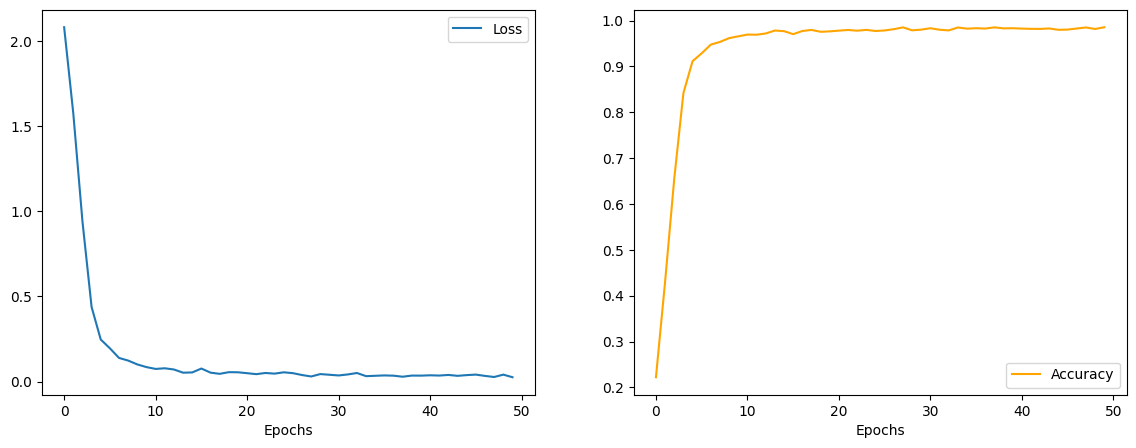

In [41]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="Loss")
plt.xlabel("Epochs")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label="Accuracy", c='orange')
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [44]:
model.save("tf_6-1m.keras")